- NAME: KEHINDE AJAYI
- WEBPAGE: https://www.cs.odu.edu/~kajay/

## ABSTRACT
- The data for this project was obtained from the UCI Machine Learning Repository. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. This is interesting because this data was collected via telemarketing approach from 2008 to 2012 which includes the effect of recent financial crisis. Therefore, knwoing the customers who will subscribe to long term deposit would help the bank design effective marketing campaigns.

- The goal of this project is to build a machine learning model to predict if a client will subscribe (yes/no) to a term deposit (variable y).
- Therefore, our target variable is the variable 'y'.


## Project Plan
- For this project, I will like to carry out the following steps:
    - Perform exploratory data analysis (EDA) to understand the relationship among the features and check for multicollinearity.
    - Handle imbalance data issue (if applicable).
    - Data visualization to further derive insights from the data.
    - Compare different classification algorithms to model the data.
    - Choose a suitable feature selection method to select important features.
    - Perform hyperparameter tuning to improve model performance.

# Obtaining the data
- The URL for this dataset can be found in the below zip folder. I have also extracted the data and for this project, I will be working with the 'bank-full' data as that is a recent version.

In [ ]:
# download the data from the website
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip


--2021-04-05 21:40:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip.2’

bank.zip.2          100%[===================>] 565.47K  2.12MB/s    in 0.3s    

2021-04-05 21:40:46 (2.12 MB/s) - ‘bank.zip.2’ saved [579043/579043]



In [ ]:
!unzip bank.zip.2

Archive:  bank.zip.2
replace bank-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-full.csv           
replace bank-names.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-names.txt          
replace bank.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank.csv                


In [ ]:
# listing the data in my current working directory
!ls

bank.csv       bank-names.txt  bank.zip.1  sample_data
bank-full.csv  bank.zip        bank.zip.2


# Data Understanding
- Here, the goal is to explore the data to understand the nature of the data, check for missing values, and devise means to handle the missing values if applicable.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load and view the first few rows of the data
df_bank = pd.read_csv('bank-full.csv', sep = ';')

df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# check the dimensions of the data
df_bank.shape

(45211, 17)

The data contains 45211 rows and 17 features

In [ ]:
# view the columns names
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# replace data points with 'unlnown' value with NaN
df = df_bank.replace('unknown', np.nan)
df['pdays'].replace(-1, np.nan, inplace = True)
df.head()
#df.to_csv()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,NaN,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,NaN,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,NaN,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,NaN,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,NaN,0,NaN,no


- I have replaced every data point with 'unknown' response with a 'NaN' to represent that the observation is missing.
- Also, I have replaced "-1" in the variable "pdays" as pday represent the number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted)

## Handling Missing Values
- Here, the objective is to find the variables with missing values, and possibly a way to handle the missing values.

In [ ]:
# check for missing values
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays        36954
previous         0
poutcome     36959
y                0
dtype: int64

- It appears that five of the variables in our data (job, education, contact, pdays, and poutcome) have missing values. There are several methods to deal with missing values. However, there is not one standard method to treat all missing values; it all depends on the type of data one is working with. Here, I have decided to treat each variable with missing values separate method.
- First, I observe that the 'contact' variable which refers to the method each person was contacted by the bank for the campaign, contains two categories (cellular and telephone) with cellular making up about 65% and telephone about 6%. It is reasonable for us to assume the unknowns were also contacted via cellular. Therefore, I would fill the missing values here with cellular label. The same intuition applies to the 'job' and 'education' variables where I would fill their missing values with the most frequent category.

- Similarly, I would remove the 'poutcome' which refers to whether previous campaign was successful, failed or never existed. This is because about 82% of the observations are missing. This same intuition applies to the 'pdays' variable.

In [ ]:
df['contact'].value_counts()

cellular     29285
telephone     2906
Name: contact, dtype: int64

In [ ]:
# remove the 'poutcome' variable
df.drop(['poutcome', 'pdays'], axis = 1, inplace = True)
#df.isnull().sum()

In [ ]:
# sanity check
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,0,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,0,no


In [ ]:
# check the most frequency category in the 'education' variable
df['job'].mode()[0], df['education'].mode()[0]

('blue-collar', 'secondary')

- Here, I define a function to impute missing observation with the most frequency category in each categorical variable. Finally, I dropped the original variables.

In [ ]:
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
#2. Call function to impute most occured category
for columns in ['job','education','contact']:
    impute_nan_most_frequent_category(df, columns)
    
# Display imputed result
df[['job','job_Imputed','education','education_Imputed','contact','contact_Imputed']].head(10)

#3. Drop actual columns
df = df.drop(['job','education','contact'], axis = 1)
df.head()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,previous,y,job_Imputed,education_Imputed,contact_Imputed
0,58,married,no,2143,yes,no,5,may,261,1,0,no,management,tertiary,cellular
1,44,single,no,29,yes,no,5,may,151,1,0,no,technician,secondary,cellular
2,33,married,no,2,yes,yes,5,may,76,1,0,no,entrepreneur,secondary,cellular
3,47,married,no,1506,yes,no,5,may,92,1,0,no,blue-collar,secondary,cellular
4,33,single,no,1,no,no,5,may,198,1,0,no,blue-collar,secondary,cellular


In [ ]:
# sanity check
df.isnull().sum()

age                  0
marital              0
default              0
balance              0
housing              0
loan                 0
day                  0
month                0
duration             0
campaign             0
previous             0
y                    0
job_Imputed          0
education_Imputed    0
contact_Imputed      0
dtype: int64

# Data Visualization
- The goal here is to further explore the relationships between the variables in the data to derive insights into which of our variables might likely contribute to predict whether or not a client would accept or decline the bank deposit. 

## Univariate Analysis
- Here, the goal is to explore the distribution of individual variables so as to derive any insights each variable might contribute to the target variable.

- Target (y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


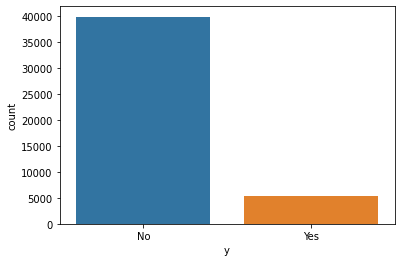

In [ ]:
# visualize the target variable
g = sns.countplot(df['y'])
g.set_xticklabels(['No','Yes'])
plt.show()

- Clearly, we see that the data is very imbalanced. Hence, we might need to handle this imbalance issue to improve model performance.

- Education

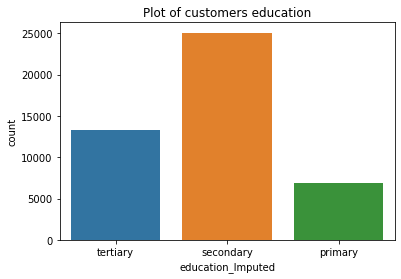

In [ ]:
sns.countplot(x = 'education_Imputed', data = df)
plt.title("Plot of customers education")
plt.show()

- It appears, there are more clients with secondary-level education compared to those with primary or tertiary-level education.

- Types of jobs

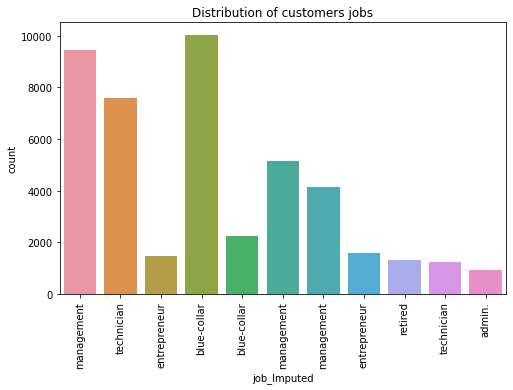

In [ ]:
plt.figure(figsize = (8, 5))
g = sns.countplot(x = 'job_Imputed', data = df)
g.set_xticklabels(labels = df['job_Imputed'], rotation = 90)
plt.title("Distribution of customers jobs")
plt.show()

- Clearly, majority of the clients are those with blue-collar jobs, technicians, and management positions.

- Marital status

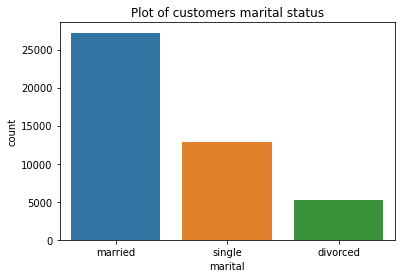

In [ ]:
sns.countplot(x = 'marital', data = df)
plt.title("Plot of customers marital status")
plt.show()

- Majority of the customers are married.

- Housing loan

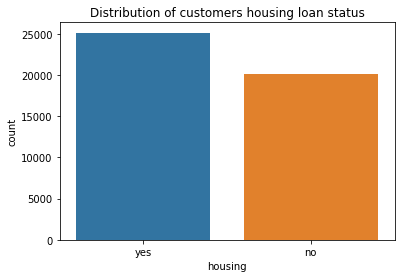

In [ ]:
sns.countplot(x = 'housing', data = df)
plt.title("Distribution of customers housing loan status")
plt.show()

- Customers who are on housing loan are about 5000 more than those who are not.

- Personal loan

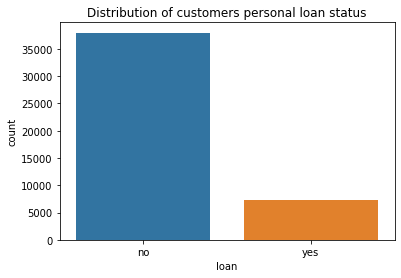

In [ ]:
sns.countplot(x = 'loan', data = df)
plt.title("Distribution of customers personal loan status")
plt.show()

- Majority of the customers are not on personal loan.

- Age

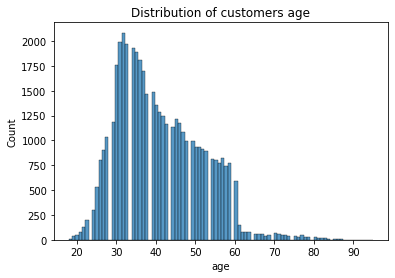

In [ ]:
sns.histplot(data = df, x = 'age')
plt.title('Distribution of customers age')
plt.show()

- It appears that most of the customers are about 30 to 35 years of age.

## Bivariate Analysis
- Here, the goal is to investigate the relationship between individual variable against the target variable.

- Age vs target

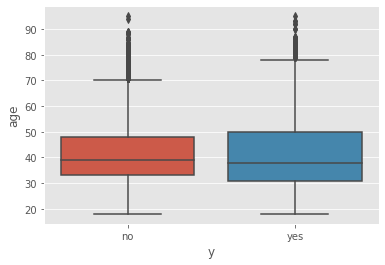

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.boxplot(x = 'y', y = 'age', data = df)
plt.show()

- Based on the plot, it appears that the average age of clients who accepted is about the same as those who declined the deposit campaign. This implies that Age has no significant effect in predicting whether a client would accept the term deposit.

- Education vs Target

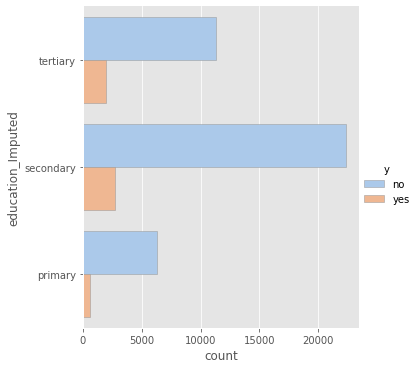

In [ ]:
sns.catplot(y="education_Imputed", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.show()

- Based on the plot above, those with secondary and tertiary education tend to decline the term-deposit comapred to those with primary education.

- Education and Age vs Target

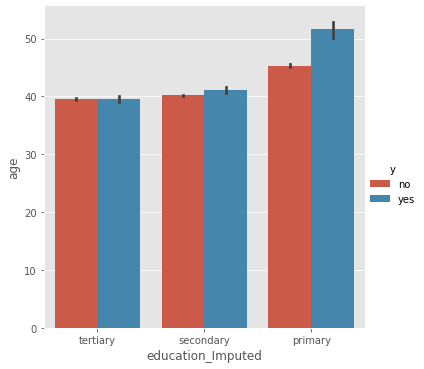

In [ ]:
sns.catplot(x = 'education_Imputed', y = 'age', hue = 'y', data = df, kind = 'bar')
plt.show()

- But after combining the age with the education-level of clients, it appears that clients who are older in age and with basic-level education tend to accept the term-deposit compared to those with secondary or tertiary education.

- Campaign vs Target

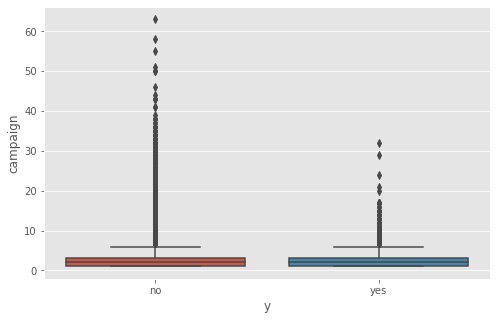

In [ ]:
plt.figure(figsize = (8, 5))
plt.style.use('ggplot')
sns.boxplot(x = 'y', y = 'campaign', data = df)
plt.show()

- The variable 'campaign' refers to the number of contacts performed during this campaign and for this client (which includes last contact). Based on the plot above, it seems clients who were contacted many times about this campaign tend to decline the term-deposit subscription.

- Marital status vs Target

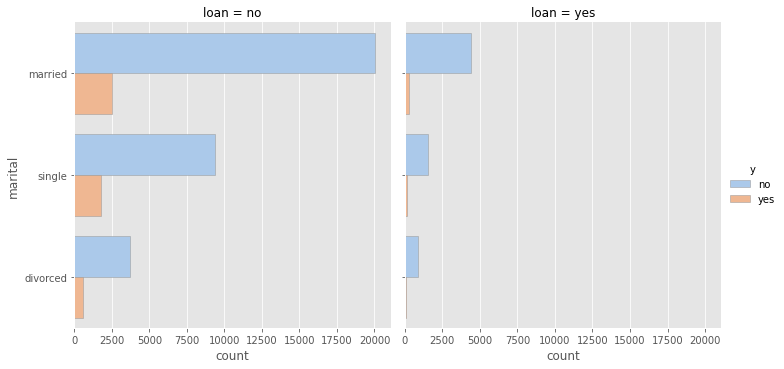

In [ ]:
sns.catplot(y="marital", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            col = 'loan', data=df)
plt.show()

- Majority of the clients who are married and have personal loan tend to decline the term-deposit.

In [ ]:
sns.catplot(y="housing", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.show()


- Here, the 'housing' variable represents those with housing loan, and as expected those with housing loan tend to decline the term-deposit more than those with no housing loan. 

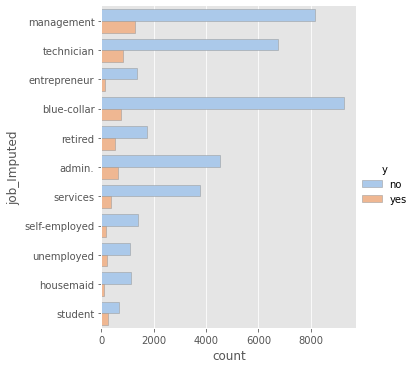

In [ ]:
sns.catplot(y="job_Imputed", hue="y", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.show()

- Based on the plot above, we see that those with blue-collar job and those in management positions tend to decline the term-deposit more compared to those with other types of job.

# Data Preparation
- Here, the goal is to prepare the data for modeling. By this, I mean there is need to convert categorical variables to numeric form since most machine learning models cannot handle data in its raw text form. 

## One-Hot Encoding
- A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.



In [ ]:
categorical_cols = ["housing", "marital", "loan", "education_Imputed", "job_Imputed", "default",
                    "contact_Imputed", "month", "y"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,age,balance,day,duration,campaign,previous,housing_yes,marital_married,marital_single,loan_yes,education_Imputed_secondary,education_Imputed_tertiary,job_Imputed_blue-collar,job_Imputed_entrepreneur,job_Imputed_housemaid,job_Imputed_management,job_Imputed_retired,job_Imputed_self-employed,job_Imputed_services,job_Imputed_student,job_Imputed_technician,job_Imputed_unemployed,default_yes,contact_Imputed_telephone,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes
0,58,2143,5,261,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,44,29,5,151,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,33,2,5,76,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,47,1506,5,92,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,33,1,5,198,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Dimension of the transformed data
df.shape

(45211, 36)

In [ ]:
df.corr()['y_yes']

age                            0.025155
balance                        0.052838
day                           -0.028348
duration                       0.394521
campaign                      -0.073172
previous                       0.093236
housing_yes                   -0.139173
marital_married               -0.060260
marital_single                 0.063526
loan_yes                      -0.068185
education_Imputed_secondary   -0.031779
education_Imputed_tertiary     0.066448
job_Imputed_blue-collar       -0.071279
job_Imputed_entrepreneur      -0.019662
job_Imputed_housemaid         -0.015195
job_Imputed_management         0.032919
job_Imputed_retired            0.079245
job_Imputed_self-employed      0.000855
job_Imputed_services          -0.027864
job_Imputed_student            0.076897
job_Imputed_technician        -0.008970
job_Imputed_unemployed         0.020390
default_yes                   -0.022419
contact_Imputed_telephone      0.014042
month_aug                     -0.008536


- From the correlation found above, it appears that the duration variable is very related to the target variable (y). This is because the duration variable refers to the last contact duration. This is because, at the end of the call, the decision of a customer would be known concerning the term deposit. Hence, it might be necessary to drop the variable. 

In [ ]:
# drop the duration variable
df1 = df.drop('duration', axis = 1)


In [ ]:
df1.columns  # duration has been removed

Index(['age', 'balance', 'day', 'campaign', 'previous', 'housing_yes',
       'marital_married', 'marital_single', 'loan_yes',
       'education_Imputed_secondary', 'education_Imputed_tertiary',
       'job_Imputed_blue-collar', 'job_Imputed_entrepreneur',
       'job_Imputed_housemaid', 'job_Imputed_management',
       'job_Imputed_retired', 'job_Imputed_self-employed',
       'job_Imputed_services', 'job_Imputed_student', 'job_Imputed_technician',
       'job_Imputed_unemployed', 'default_yes', 'contact_Imputed_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'y_yes'],
      dtype='object')

In [ ]:
df1['y_yes'].value_counts()

0    39922
1     5289
Name: y_yes, dtype: int64

- We can see that the majority class is 0 which refers to customers who decline the term deposit. So, we may need to balance the data. However, we would build the model with and without balancing the data with the objective of comparing the models to see which is better.

# Modelling
- Under the modelling section, the following would be performed:
  - Select features to build our models
  - Split the data into training, validation and testing sets. The training sets will be used to build the model, validation sets will be used to tune the hyperparameters of the model, and the test sets will be used to to finally validate the model built.
  - Build several classification models 
  - Evaluate our model using cross-validation and metrics such as F-Measure
  - Handle the imbalance issue and compare the result with the best model with imbalance classes. 

## Pre-Model Building
- This is where I would select the all the features and target for the model. I would also split the data into the training, validation and test sets.

In [ ]:
# select the features and the target for the model
features = df1.drop('y_yes', axis = 1)
target = df1['y_yes']

In [ ]:
# sanity check
features.head()

,age,balance,day,campaign,previous,housing_yes,marital_married,marital_single,loan_yes,education_Imputed_secondary,education_Imputed_tertiary,job_Imputed_blue-collar,job_Imputed_entrepreneur,job_Imputed_housemaid,job_Imputed_management,job_Imputed_retired,job_Imputed_self-employed,job_Imputed_services,job_Imputed_student,job_Imputed_technician,job_Imputed_unemployed,default_yes,contact_Imputed_telephone,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,29,5,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,2,5,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33,1,5,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
target[:2]

0    0
1    0
Name: y_yes, dtype: uint8

In [ ]:
# split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

# split the data into training_val and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

# split the training_val into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state = 0)


In [ ]:
# check the length of the datasets
X_train.shape, X_test.shape, X_val.shape

((28934, 34), (9043, 34), (7234, 34))

## Standardization
- Here, I would scale the features in order to bring all the features to a similar range. There are several options to scale the data such as MinMax Scaler and Standard Scaler. MinMax Scaler scales the data to a range of 0 and 1, while the Standard Scaler scales the data with a mean of 0 and standard deviation of 1.
- It is advisable to scale our data because some algorithms makes use of distance function in building the model. Therefore, features with very large values may dominate the model, thereby resulting in a bias model.

In [ ]:
# load the standard scaler module
from sklearn.preprocessing import StandardScaler

# create an instance of the scaler
scaler = StandardScaler()

# scaler the training, validation and test set
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Model Building
- Here, I would try out different models and comapare their performances with the metrics "accuracy", "precision", and "recall", and "F-score".



### K-Nearest Neighbor Classifier (KNN)
- KNN Classifier is a classification model used for supervised learning where we have a target label associated with the features. It is called a lazy algorithm because it only stores the training data points. So, to make a prediction for a new data point, it only considers the closest point(s) in the training set to the new data point.

In [ ]:
# load the KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# create an instance of the classifier
knn = KNeighborsClassifier()  # using the default number of neighbors (5)

# build the model
knn_model = knn.fit(X_train_scaled, y_train)

# check the accuracy measure on the training and validation set
print("Training Accuracy: {:.4f}".format(knn.score(X_train_scaled, y_train)))
print("Validation Accuracy: {:.4f}".format(knn.score(X_val_scaled, y_val)))

Training Accuracy: 0.9007
Validation Accuracy: 0.8768


- Our KNN model has a validation accuracy of about 87.7%.

- In addition to the accuracy metrics, we would like to observe the precision, recall, and F-score of each model.

In [ ]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


#### Precision and Recall for the first KNN model

In [ ]:
# First, we make a prediction on the test data 
knn_pred = knn_model.predict(X_test_scaled)

# calculate the precision and recall scores
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f_score = f1_score(y_test, knn_pred)

print("KNN Precision score: {:.4f}".format(knn_precision))
print("KNN Recall score: {:.4f}".format(knn_recall))
print("KNN F score: {:.4f}".format(knn_f_score))

KNN Precision score: 0.4257
KNN Recall score: 0.1590
KNN F score: 0.2315


- Based on the results of the precision and recall scores, we have a precision of 42.6% and recall of 15.9%. This may be due to the imbalance classes in the data. This is interesting as we would like to compare these against the precision and recall after we address the imbalance issue. Finally, the F-score of the KNN model is 23.2%.

In [ ]:
print(knn)    # check the hyperparameters used for the KNN model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


- The major hyperparameter we can tune here is the 'n_neighbors' which refers to the number of neighbors in the training set closest to the new data point we want to predict label for. So, I would consider few other neighbors and then visualize the accuracy for each neighbor.

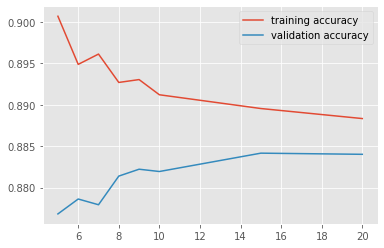

In [ ]:
num_neighbors = [5, 6, 7, 8, 9, 10, 15, 20]

training_accuracy = []
validation_accuracy = []

for n_neighbors in num_neighbors:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn_model = knn.fit(X_train_scaled, y_train)

  # append the training accuracy to the training accuracy list
  training_accuracy.append(knn.score(X_train_scaled, y_train))
  validation_accuracy.append(knn.score(X_val_scaled, y_val))

# visualize the plot
plt.plot(num_neighbors, training_accuracy, label = "training accuracy") 
plt.plot(num_neighbors, validation_accuracy, label = "validation accuracy")
plt.legend(loc = 'best')
plt.show() 

- It appears that our KNN model overfits for all the different number of neighbors considered. I would refit the KNN model with 9 number of neigbors as that gives a fairaly better result than the default value.

In [ ]:
# create an instance of the classifier
knn2 = KNeighborsClassifier(n_neighbors = 9)  # using the default number of neighbors (5)

# build the model
knn_model2 = knn2.fit(X_train_scaled, y_train)

# check the accuracy measure on the training and validation set
print("Training Accuracy: {:.4f}".format(knn2.score(X_train_scaled, y_train)))
print("Validation Accuracy: {:.4f}".format(knn2.score(X_val_scaled, y_val)))

Training Accuracy: 0.8930
Validation Accuracy: 0.8822


So, we see the training accuracy reduces a bit while the validation accuracy increases from 87.7% to 88.2% with 9 neighors. This suggest that, the KNN model (knn_model2) perform better than the first model in terms of predicting term-deposit subscription.

#### Precision and Recall for the seconmd KNN model

In [ ]:
# First, we make a prediction on the test data 
knn2_pred = knn2.predict(X_test_scaled)

# calculate the precision and recall scores
knn2_precision = precision_score(y_test, knn2_pred)
knn2_recall = recall_score(y_test, knn2_pred)
knn2_f_score = f1_score(y_test, knn2_pred)

print("KNN Precision score: {:.4f}".format(knn2_precision))
print("KNN Recall score: {:.4f}".format(knn2_recall))
print("KNN F score: {:.4f}".format(knn2_f_score))

KNN Precision score: 0.4464
KNN Recall score: 0.1176
KNN F score: 0.1862


- Here, we a precision of 44.6%, recall of 11.7%, and an F score of 18.6%.

### Logistic Regression
- This is a linear model used to solve a binary classification problem such that the output are constrained to a form of 0 or 1, so that it can be interpreted as a probability.
- The goal is that, if the predicted probability is greater than 0.5, then class 1 is predicted, otherwise, class 0 is predicted. This implies, I am considering the threshold to be 0.5.

In [ ]:
from sklearn.linear_model import LogisticRegression

# create an instance of the Logistic regression model
logreg1 = LogisticRegression(random_state=0)

# fit the logistic regression on the training and validation sets
logreg1.fit(X_train_scaled, y_train)

print("Logistic training accuracy: {:.4f}".format(logreg1.score(X_train_scaled, y_train)))
print("Logistic validation accuracy: {:.4f}".format(logreg1.score(X_val_scaled, y_val)))

Logistic training accuracy: 0.8838
Logistic validation accuracy: 0.8828


- One of the hyparameters to tune in the Logistic regression above is the parameter C, which signifies the strength of regularization applied to the model. By regularization, we mean a way of restricting the coefficients of the model to reduce their impacts on the model. Smaller value of C implies more regularization and vice versa. Here, I would consider a value of 0.5 instead of the default 1.0 value of C.

In [ ]:
logreg2 = LogisticRegression(C = 0.5)

# fit the logistic regression on the training and validation sets
logreg2.fit(X_train_scaled, y_train)

print("Logistic training accuracy: {:.4f}".format(logreg2.score(X_train_scaled, y_train)))
print("Logistic validation accuracy: {:.4f}".format(logreg2.score(X_val_scaled, y_val)))

Logistic training accuracy: 0.8838
Logistic validation accuracy: 0.8828


- From the result above, we can say that the Logistic regression performance is approximately equal to that of the KNN model, and that there is no difference in the results of the two Logistic regression models. 

##### Precision and Recall for the first and second Logistic Regression model.

In [ ]:
# First, we make a prediction on the test data 
logreg_pred = logreg1.predict(X_test_scaled)

# calculate the precision and recall scores
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f_score = f1_score(y_test, logreg_pred)

print("Logistic Precision score: {:.4f}".format(logreg_precision))
print("Logistic Recall score: {:.4f}".format(logreg_recall))
print("Logistic F score: {:.4f}".format(logreg_f_score))

Logistic Precision score: 0.4526
Logistic Recall score: 0.0583
Logistic F score: 0.1033


- Similarly, the precision and recall of the Logistic regression model are opposite to that of the KNN models, in that the precision is higher thatn the recall for Logistic regression. Also, the F score is about 10%.

### Tree-based models
- Next, we consider tree-based models like Decision tree, Random Forest and Gradient Boosting. Tree-based models are non-parameteric models whose basis are the decision trees.
- Tree-based models are invariant to feature scaling, hence we do not need to scale the features to a similar range when building tree-based models.
#### Decision Trees 
- Decision trees are series of decision rules starting from the top node called the root node to the end node containing no decision rule called a leaf.
- Decision tree learners attempt to find decision rules that produces the greatest decrease in impurity. By default, it uses the Gini impurity to measure how level of impurity at each node of the tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# create an instance of the classifier
tree1 = DecisionTreeClassifier(random_state = 0)

# fit the logistic regression on the training and validation sets
tree1.fit(X_train, y_train)

print("Decision tree training accuracy: {:.4f}".format(tree1.score(X_train, y_train)))
print("Decision tree validation accuracy: {:.4f}".format(tree1.score(X_val, y_val)))

Decision tree training accuracy: 1.0000
Decision tree validation accuracy: 0.8155


- As seen above, decision tree is prone to overfitting, where the model performed well on the training data and worse on new data. Therefore, we can either stop the building of the model early (setting the depth of the tree) of we consider collection of trees such as ensemble or boosting methods.

##### Precision and Recall for the first Decision Tree model.

In [ ]:
# First, we make a prediction on the test data 
tree1_pred = tree1.predict(X_test)

# calculate the precision and recall scores
tree1_precision = precision_score(y_test, tree1_pred)
tree1_recall = recall_score(y_test, tree1_pred)
tree1_f_score = f1_score(y_test, tree1_pred)

print("Decision tree 1 Precision score: {:.4f}".format(tree1_precision))
print("Decision tree 1 Recall score: {:.4f}".format(tree1_recall))
print("Decision tree 1 F score: {:.4f}".format(tree1_f_score))

Decision tree 1 Precision score: 0.2546
Decision tree 1 Recall score: 0.2756
Decision tree 1 F score: 0.2647


- The recall of the Decision tree is slightly more than the precision with precision of about 25% and recall of about 27%. Also, the F score is about 26%.

In [ ]:
print(tree1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


- Instead of allowing the tree to be fully built, we have decided to stop the tree building at the depth of 5 to see the effect on the model performance. This is necessary as Decision tree is prone to overfitting, so reducing the depth of the tree can reduce the rate of overfitting.

In [ ]:
# create an instance of the classifier
tree2 = DecisionTreeClassifier(random_state = 0, max_depth=5)

# fit the logistic regression on the training and validation sets
tree2.fit(X_train, y_train)

print("Decision tree training accuracy: {:.4f}".format(tree2.score(X_train, y_train)))
print("Decision tree validation accuracy: {:.4f}".format(tree2.score(X_val, y_val)))

Decision tree training accuracy: 0.8863
Decision tree validation accuracy: 0.8814


- It appears that reducing the depth of the tree to about 5 reduces the training accuracy and increases the test accuracy, hence solving the overfitting problem.

##### Precision and Recall for the second Decision Tree model.

In [ ]:
# First, we make a prediction on the test data 
tree2_pred = tree2.predict(X_test)

# calculate the precision and recall scores
tree2_precision = precision_score(y_test, tree2_pred)
tree2_recall = recall_score(y_test, tree2_pred)
tree2_f_score = f1_score(y_test, tree2_pred)

print("Decision tree 2 Precision score: {:.4f}".format(tree2_precision))
print("Decision tree 2 Recall score: {:.4f}".format(tree2_recall))
print("Decision tree 2 F score: {:.4f}".format(tree2_f_score))

Decision tree 2 Precision score: 0.4545
Decision tree 2 Recall score: 0.0376
Decision tree 2 F score: 0.0695


- Here, we see that the precision for the pruned decision tree increases from about 25% to about 45%, while the recall decreases. Also, the F score is very low (about 7%).

#### Random Forests
- In a random forest, many decision trees are trained, but each tree only receives a bootstrapped sample of observations (i.e., a random sample of observations with replacement that matches the original number of observations) and each node only considers a subset of features when determining the best split.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# create an instance of the Random Forest classifier
rf1 = RandomForestClassifier(random_state = 0, n_jobs=-1)

# train the classifier
rf1.fit(X_train, y_train)

print("Random Forest 1 training accuracy: {:.4f}".format(rf1.score(X_train, y_train)))
print("Random Forest 1 validation accuracy: {:.4f}".format(rf1.score(X_val, y_val)))

Random Forest 1 training accuracy: 1.0000
Random Forest 1 validation accuracy: 0.8833


- It also appears that the Random forest model overfits similarly to the Decision tree, though the rate of overfitting is small compared to that of Decision tree. Hence, we can also adjust some of the hyperparameters to curb the rate of overfitting of the model.

#### Precision and Recall for the first Random Forest model

In [ ]:
# First, we make a prediction on the test data 
rf1_pred = rf1.predict(X_test)

# calculate the precision and recall scores
rf1_precision = precision_score(y_test, rf1_pred)
rf1_recall = recall_score(y_test, rf1_pred)
rf1_f_score = f1_score(y_test, rf1_pred)

print("Random Forest 1 Precision score: {:.4f}".format(rf1_precision))
print("Random Forest 1 Recall score: {:.4f}".format(rf1_recall))
print("Random Forest 1 F score: {:.4f}".format(rf1_f_score))

Random Forest 1 Precision score: 0.5492
Random Forest 1 Recall score: 0.1364
Random Forest 1 F score: 0.2185


- Here, we see that the random forest model with the default hyperparameter values produces a precision of about 54% and recall of about 13%. Also, the F score is about 21%.

- Similarly, to our Decision tree, we specify a max_depth of 4 to consider tree with a depth of 4 and n_estimators of 300, which stands for the number of trees in the forest we considered. Generally, Random Forest performs better with higher number of trees and low depth.

In [ ]:
# create an instance of the Random Forest classifier
rf2 = RandomForestClassifier(random_state = 0, n_jobs=-1, n_estimators = 300, max_depth=4)

# train the classifier
rf2.fit(X_train, y_train)

print("Random Forest 2 training accuracy: {:.4f}".format(rf2.score(X_train, y_train)))
print("Random Forest 2 validation accuracy: {:.4f}".format(rf2.score(X_val, y_val)))

Random Forest 2 training accuracy: 0.8839
Random Forest 2 validation accuracy: 0.8801


- It appears that the overfitting problem is resolved. However, the validation accuracy of the second random forest model with max_depth of 4 is lower compared to the one with the default hyperparameters.

#### Identifying important features in Random Forest
- Tree-based models have a way to select the features that are important to the model built. 

In [ ]:
# calculate the rate of importance for each of the features in the model
importances = rf1.feature_importances_

# sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features.columns[i] for i in indices]

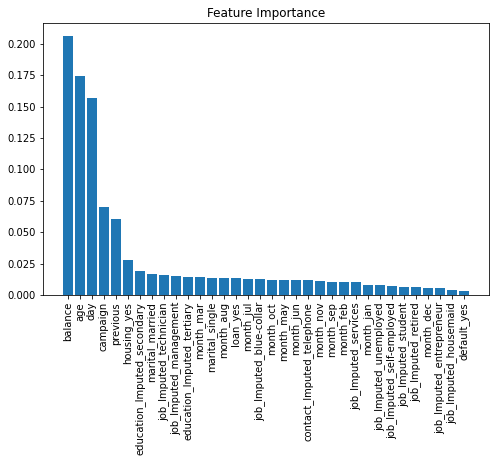

In [ ]:
# Create plot
plt.figure(figsize = (8, 5))
# Create plot title
plt.title("Feature Importance") # Add bars
plt.bar(range(features.shape[1]), importances[indices]) # Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90) 
# Show plot
plt.show()

- Based on the feature importance plot above, it appears that the most importance features considered by the random forest model are balance, age, and day the customers were contacted. 
- The limitation here is that, in scikit-learn, for nominal categorical variables that have been split into multiple binary variables, the importances gets spread over the binary variables such that it appears that features are less important even though the original nominal variable is more important.

#### Feature Selection
- Here, we want to select some features with importance greater than some threshold value, and then re-build the original model with these new features to see if there will be any improvement. The benefit of this approach is that, the featureimportances get diluted for the nominal categorical variables.

In [ ]:
from sklearn.feature_selection import SelectFromModel
# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth = 4)

# Create object that selects features with importance greater # than or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.05)
    
# Feature new feature matrix using selector
features_important = selector.fit_transform(X_train, y_train) # Train random forest using most important featres

rf_model = randomforest.fit(features_important, y_train)

In [ ]:
# transform the validation set to select the important features
val_features = selector.transform(X_val)

print("Random forest training accuracy with features selected: {:.4f}".format(rf_model.score(features_important, 
                                                                                             y_train)))
print("Random forest validation accuracy with features selected: {:.4f}".format(rf_model.score(val_features, 
                                                                                               y_val)))

Random forest training accuracy with features selected: 0.8842
Random forest validation accuracy with features selected: 0.8800


- Here, we set the threshold to 0.05, which implies that only 5 features are included in the random forest model, and the validation accuracy is equal to the one with all of the features included. Hence, I would say, the simpler model (rf_model) is preferable as it is more interpretable compared to previous model with all of the features.

#### Boosting (AdaBoost)
- Boosting works by iteratively training a series of weak decision trees, sometimes called stumps, with higher priority given to the incorrect observations the previous model predicted incorrectly.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# create an instance of the AdaBoost classifier
adaboost1 = AdaBoostClassifier(random_state = 0)

# train the model
adaboost1.fit(X_train, y_train)

print("Adaboost 1 training accuracy: {:.4f}".format(adaboost1.score(X_train, y_train)))
print("Adaboost 1 validation accuracy: {:.4f}".format(adaboost1.score(X_val, y_val)))

Adaboost 1 training accuracy: 0.8845
Adaboost 1 validation accuracy: 0.8837


#### Precision and Accuracy of the first Adaboost model

In [ ]:
# First, we make a prediction on the test data 
adaboost1_pred = adaboost1.predict(X_test)

# calculate the precision and recall scores
adaboost1_precision = precision_score(y_test, adaboost1_pred)
adaboost1_recall = recall_score(y_test, adaboost1_pred)
adaboost1_f_score = f1_score(y_test, adaboost1_pred)

print("Adaboost 1 Precision score: {:.4f}".format(adaboost1_precision))
print("Adaboost 1 Recall score: {:.4f}".format(adaboost1_recall))
print("Adaboost 1 F score: {:.4f}".format(adaboost1_f_score))

Adaboost 1 Precision score: 0.5430
Adaboost 1 Recall score: 0.1129
Adaboost 1 F score: 0.1869


- We see that the precision of Adaboost model is about 54% while the recall is about 11%. Also, the F score is about 18%.

In [ ]:
adaboost1

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=0)

- Here, we increased the number of trees used in building the model to 150 instead of the default number of 50 to see if this will have any effect on the model.

In [ ]:
# create an instance of the AdaBoost classifier
adaboost2 = AdaBoostClassifier(random_state = 0, n_estimators= 150)

# train the model
adaboost2.fit(X_train, y_train)

print("Adaboost 2 training accuracy: {:.4f}".format(adaboost2.score(X_train, y_train)))
print("Adaboost 2 validation accuracy: {:.4f}".format(adaboost2.score(X_val, y_val)))

Adaboost 2 training accuracy: 0.8853
Adaboost 2 validation accuracy: 0.8831


- After, increasing the number of trees to 150, the validation accuracy decreased a little bit compared to the model with the default number of trees.

In [ ]:
# First, we make a prediction on the test data 
adaboost2_pred = adaboost2.predict(X_test)

# calculate the precision and recall scores
adaboost2_precision = precision_score(y_test, adaboost2_pred)
adaboost2_recall = recall_score(y_test, adaboost2_pred)
adaboost2_f_score = f1_score(y_test, adaboost2_pred)

print("Adaboost 2 Precision score: {:.4f}".format(adaboost2_precision))
print("Adaboost 2 Recall score: {:.4f}".format(adaboost2_recall))
print("Adaboost 2 F score: {:.4f}".format(adaboost2_f_score))

Adaboost 2 Precision score: 0.5340
Adaboost 2 Recall score: 0.1035
Adaboost 2 F score: 0.1734


### Support Vector Machine
- Support Vector Machine or simply SVM classify data by finding the best hyperplane or decision boundary that maximizes the margin between the classes in the training dataset. 
- The Linear SVC tries to find a linear hyperplane to separate the classes in the training data. However, for complex data where the classes are inseparable, the Linear SVC may not be able to find the hyperplane that will maximize the margin between the class and also minimize the misclassification error on the training data. In such case, we can opt for the SVC with kernel such as rbf (radial-basis function).

In [ ]:
from sklearn.svm import SVC, LinearSVC

# create instances of the linear SVC and SVC classifiers
linear_svc = LinearSVC(random_state = 0)
svc = SVC(random_state = 0, kernel = 'rbf')

# train both models
linear_svc.fit(X_train_scaled, y_train)
svc.fit(X_train_scaled, y_train)

print("Linear_SVC test accuracy: {:.4f}".format(linear_svc.score(X_val_scaled, y_val)))
print("SVC test accuracy: {:.4f}".format(svc.score(X_val_scaled, y_val)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear_SVC test accuracy: 0.8825
SVC test accuracy: 0.8839


- Here, we see that the SVM with rbf kernel performs slightly more than that with linear kernel.

# Handling Imbalance data
- One way to solve the problem of imbalance data is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

- Here, we will use the Synthetic Minority Over-Sampling Technique (SMOTE) to balance the data. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

- The goal here, is to balance the data and then re-build those models we have built before, and finally compare the performances of these models.



In [ ]:
# import library
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE


smote = SMOTE()

# fit predictor and target variable
features_smote, target_smote = smote.fit_resample(features, target)
print("Original target shape: {}".format(Counter(target)))
print("Resampled target shape: {}".format(Counter(target_smote)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original target shape: Counter({0: 39922, 1: 5289})
Resampled target shape: Counter({0: 39922, 1: 39922})


In [ ]:
len(features_smote)

79844

## Data preparation
- Here, we split the data into training, validation, and test data. 
- We would also scale the data to as before using the StandardScaler module.

In [ ]:
# split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

# split the data into training_val and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(features_smote, target_smote, test_size = 0.2, 
                                                            random_state = 0)

# split the training_val into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state = 0)


In [ ]:
# load the standard scaler module
from sklearn.preprocessing import StandardScaler

# create an instance of the scaler
scaler = StandardScaler()

# scaler the training, validation and test set
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Model Re-building 
- As mentioned above, we would consider the already built models such as KNN, Logistic regression, Tree-based models, and SVM with the balanced data.

### K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# create an instance of the classifier
knn_balanced = KNeighborsClassifier()  # using the default number of neighbors (5)

# build the model
knn_balanced.fit(X_train_scaled, y_train)

# check the accuracy measure on the training and validation set
print("Training Accuracy: {:.4f}".format(knn_balanced.score(X_train_scaled, y_train)))
print("Validation Accuracy: {:.4f}".format(knn_balanced.score(X_val_scaled, y_val)))

Training Accuracy: 0.9251
Validation Accuracy: 0.9034


- It appears that the performance of the KNN model improves over both the training and validation sets for the balanced data.

#### Precision and Recall of the new KNN model

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# make prediction
knn_balanced_pred = knn_balanced.predict(X_test_scaled)
# calculate the precision and recall scores
knn_balanced_precision = precision_score(y_test, knn_balanced_pred)
knn_balanced_recall = recall_score(y_test, knn_balanced_pred)
knn_balanced_fscore = f1_score(y_test, knn_balanced_pred)

print("KNN balance Precision score: {:.4f}".format(knn_balanced_precision))
print("KNN balance Recall score: {:.4f}".format(knn_balanced_recall))
print("KNN balance F score: {:.4f}".format(knn_balanced_fscore))

KNN balance Precision score: 0.9202
KNN balance Recall score: 0.8824
KNN balance F score: 0.9009


- Here, we have a precision of 92%, recall of 88.2% and an F score of 90.1%. This is a great improvement over the original KNN models.

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# create an instance of the Logistic regression model
logreg_balanced = LogisticRegression(random_state=0)

# fit the logistic regression on the training and validation sets
logreg_balanced.fit(X_train_scaled, y_train)

print("Logistic training accuracy: {:.4f}".format(logreg_balanced.score(X_train_scaled, y_train)))
print("Logistic validation accuracy: {:.4f}".format(logreg_balanced.score(X_val_scaled, y_val)))

Logistic training accuracy: 0.8927
Logistic validation accuracy: 0.8901


- Similarly, the Logistic regression model for the balanced data still performs better compared to the one with imbalanced data problem.

#### Precision and Recall of the new Logistic regression model

In [ ]:
# First, we make a prediction on the test data 
logreg_balanced_pred = logreg_balanced.predict(X_test_scaled)

# calculate the precision and recall scores
logreg_balanced_precision = precision_score(y_test, logreg_balanced_pred)
logreg_balanced_recall = recall_score(y_test, logreg_balanced_pred)
logreg_balanced_fscore = f1_score(y_test, logreg_balanced_pred)

print("Logistic balance Precision score: {:.4f}".format(logreg_balanced_precision))
print("Logistic balance Recall score: {:.4f}".format(logreg_balanced_recall))
print("Logistic balance F score: {:.4f}".format(logreg_balanced_fscore))

Logistic balance Precision score: 0.9122
Logistic balance Recall score: 0.8687
Logistic balance F score: 0.8899


- Similarly, we have a precision of 91.2%, recall 86.9%, and an F score of 89.0%.

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# create an instance of the classifier
tree_balanced = DecisionTreeClassifier(random_state = 0, max_depth=10)

# fit the logistic regression on the training and validation sets
tree_balanced.fit(X_train, y_train)

print("Decision tree balance training accuracy: {:.4f}".format(tree_balanced.score(X_train, y_train)))
print("Decision tree balance validation accuracy: {:.4f}".format(tree_balanced.score(X_val, y_val)))

Decision tree balance training accuracy: 0.8999
Decision tree balance validation accuracy: 0.8800


- Here, there is no much difference in the accuracies of the new decision tree model with balanced data compared to that of imbalanced data.

#### Precision and Recall of the new Decision tree model

In [ ]:
tree_balanced_pred = tree_balanced.predict(X_test)

# calculate the precision and recall scores
tree_balanced_precision = precision_score(y_test, tree_balanced_pred)
tree_balanced_recall = recall_score(y_test, tree_balanced_pred)
tree_balanced_fscore = f1_score(y_test, tree_balanced_pred)

print("Decision tree balance Precision score: {:.4f}".format(tree_balanced_precision))
print("Decision tree balance Recall score: {:.4f}".format(tree_balanced_recall))
print("Decision tree balance F score: {:.4f}".format(tree_balanced_fscore))

Decision tree balance Precision score: 0.8926
Decision tree balance Recall score: 0.8666
Decision tree balance F score: 0.8794


- Here, we have a precision of 89.3%, recall of 86.7%, and an F score of 87.9%.

### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_balanced = RandomForestClassifier(random_state = 0, n_jobs=-1, n_estimators = 300, max_depth=4)

# train the classifier
rf_balanced.fit(X_train, y_train)

print("Random Forest balance training accuracy: {:.4f}".format(rf_balanced.score(X_train, y_train)))
print("Random Forest balance validation accuracy: {:.4f}".format(rf_balanced.score(X_val, y_val)))

Random Forest balance training accuracy: 0.8328
Random Forest balance validation accuracy: 0.8304


- Similarly to the Decision tree model, there is no improvement in the accuracy of the Random Forest model on the balanced data.

#### Precision and Recall of the new Random Forest model

In [ ]:
# First, we make a prediction on the test data 
rf_balanced_pred = rf_balanced.predict(X_test)

# calculate the precision and recall scores
rf_balanced_precision = precision_score(y_test, rf_balanced_pred)
rf_balanced_recall = recall_score(y_test, rf_balanced_pred)
rf_balanced_fscore = f1_score(y_test, rf_balanced_pred)

print("Random Forest balance Precision score: {:.4f}".format(rf_balanced_precision))
print("Random Forest balance Recall score: {:.4f}".format(rf_balanced_recall))
print("Random Forest balance F score: {:.4f}".format(rf_balanced_fscore))

Random Forest balance Precision score: 0.8314
Random Forest balance Recall score: 0.8422
Random Forest balance F score: 0.8368


- Here, we have a precision of 83%, recall of 84%, and an F score of 83.6%

### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# create an instance of the AdaBoost classifier
adaboost_balanced = AdaBoostClassifier(random_state = 0, n_estimators=150)

# train the model
adaboost_balanced.fit(X_train, y_train)

print("Adaboost balance training accuracy: {:.4f}".format(adaboost_balanced.score(X_train, y_train)))
print("Adaboost balance validation accuracy: {:.4f}".format(adaboost_balanced.score(X_val, y_val)))

Adaboost balance training accuracy: 0.8957
Adaboost balance validation accuracy: 0.8915


- Here, there is a slight improvement in the accuracy of the Adaboost model for the balanced data.

#### Precision and Recall of the new Adaboost model

In [ ]:
# First, we make a prediction on the test data 
adaboost_balanced_pred = adaboost_balanced.predict(X_test)

# calculate the precision and recall scores
adaboost_balanced_precision = precision_score(y_test, adaboost_balanced_pred)
adaboost_balanced_recall = recall_score(y_test, adaboost_balanced_pred)
adaboost_balanced_fscore = f1_score(y_test, adaboost_balanced_pred)

print("Adaboost balance Precision score: {:.4f}".format(adaboost_balanced_precision))
print("Adaboost balance Recall score: {:.4f}".format(adaboost_balanced_recall))
print("Adaboost balance F score: {:.4f}".format(adaboost_balanced_fscore))


Adaboost balance Precision score: 0.9069
Adaboost balance Recall score: 0.8780
Adaboost balance F score: 0.8922


- Here, we have a precision of 90.7%, recall of 87.8%, and an F score of 89.2%.

### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC, LinearSVC

# create instances of the linear SVC and SVC classifiers
linear_balanced_svc = LinearSVC(random_state = 0, max_iter=10000)
svc_balanced = SVC(random_state = 0, kernel = 'rbf')

# train both models
linear_balanced_svc.fit(X_train_scaled, y_train)
svc_balanced.fit(X_train_scaled, y_train)

print("Linear_SVC balance test accuracy: {:.4f}".format(linear_balanced_svc.score(X_val_scaled, y_val)))
print("SVC balance test accuracy: {:.4f}".format(svc_balanced.score(X_val_scaled, y_val)))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear_SVC balance test accuracy: 0.8880
SVC balance test accuracy: 0.9018


- Finally, the accuracy of the SVM model improves slightly on the balanced data compared to that on the imbalanced data.

# Model Comparison 
- Here, we compare all the models except the SVM model using their accuracies, precision, and recall. We did not include the SVM because, it did not converge on the training data.

## Comparing models on imbalanced data

In [ ]:
data = {'Models': ["Knn_1", "Knn_2", "Logreg_1", "Logreg_2", "Dec_tree1", "Dec_tree2", "RF",
                   "Adaboost_1", "Adaboost_2"],
        "Test_acc": [87.7, 88.2, 88.3, 88.3, 81.6, 88.1, 88.3, 88.4, 88.3],
        "Precision": [42.6, 44.6, 45.3, 45.3, 25.5, 45.5, 54.9, 54.3, 53.4],
        "Recall": [15.9, 11.8, 5.83, 5.83, 27.6, 37.6, 13.6, 11.3, 10.4],
        "F-score": [23.2, 18.6, 10.3, 10.3, 26.5, 6.95, 21.9, 18.7, 17.3]}
model_comparison = pd.DataFrame(data = data)

# display the table of performance comparison
model_comparison

,Models,Test_acc,Precision,Recall,F-score
0,Knn_1,87.7,42.6,15.90,23.20
1,Knn_2,88.2,44.6,11.80,18.60
2,Logreg_1,88.3,45.3,5.83,10.30
3,Logreg_2,88.3,45.3,5.83,10.30
4,Dec_tree1,81.6,25.5,27.60,26.50
5,Dec_tree2,88.1,45.5,37.60,6.95
6,RF,88.3,54.9,13.60,21.90
7,Adaboost_1,88.4,54.3,11.30,18.70
8,Adaboost_2,88.3,53.4,10.40,17.30


## Comparing models on balanced data

In [ ]:
import pandas as pd
data_2 = {'Models': ["Knn", "Logreg", "Dec_tree", "RF", "Adaboost"],
        "Test_acc": [90.3, 89.01, 88, 83.04, 89.2],
        "Precision": [92, 91.2, 89.26, 83.14, 90.7],
        "Recall": [88, 86.9, 86.7, 84.2, 87.8],
        "F-score": [90.1, 88.99, 87.9, 83.9, 89.2]}
model_comparison_2 = pd.DataFrame(data = data_2)

# display the table of performance comparison
model_comparison_2

,Models,Test_acc,Precision,Recall,F-score
0,Knn,90.30,92.00,88.0,90.10
1,Logreg,89.01,91.20,86.9,88.99
2,Dec_tree,88.00,89.26,86.7,87.90
3,RF,83.04,83.14,84.2,83.90
4,Adaboost,89.20,90.70,87.8,89.20


# Conclusion

- The goal of this project is to build a model to predict whether or not a bank customer will subscribe to a term deposit or not. In this project, we have explored different relationships between the variables in the data to further understand the data. We have also built different classification models such as Logistic regression, K-Nearest models, e.t.c., with the data unbalanced and also with the data balanced, and we showed that Machine learning model performance can be substantially improved and more reliable when the data is balanced. Also, based on the F1 scores in the table above, our best models are KNN and Adaboost with Fscores of 90.1% and 89.2% on our test data.